# **FNN Classifier on MNIST Dataset**

## Loading Libraries

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from tabulate import tabulate

## Loading Dataset

In [14]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to the range of 0 to 1
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

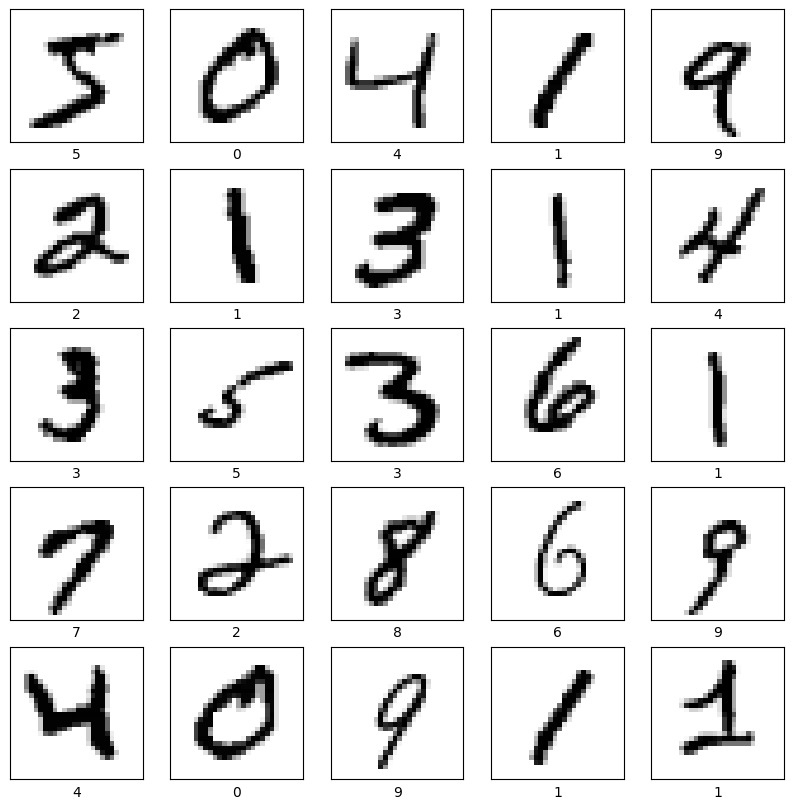

In [15]:
# Visualize few samples from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Defining the FNN Model

In [16]:
# Build the FNN model
model = models.Sequential()
# model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Training the Model

In [18]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8966 - loss: 0.3345 - val_accuracy: 0.9640 - val_loss: 0.1154
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9731 - loss: 0.0891 - val_accuracy: 0.9629 - val_loss: 0.1270
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9798 - loss: 0.0649 - val_accuracy: 0.9762 - val_loss: 0.0807
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0433 - val_accuracy: 0.9747 - val_loss: 0.0923
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9892 - loss: 0.0355 - val_accuracy: 0.9762 - val_loss: 0.0906


## Saving the model

In [28]:
# Save the model architecture as JSON
model_json = model.to_json()
with open("fnn_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights with the correct filename
model.save_weights("fnn_model_weights.weights.h5")

print("Model architecture and weights saved to disk.")

# # To Load Model ::
# # Load the JSON file that contains the model architecture
# with open('fnn_model.json', 'r') as json_file:
#     loaded_model_json = json_file.read()

# # Reconstruct the model from the JSON file
# loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# # Load the saved weights into the model
# loaded_model.load_weights("fnn_model_weights.h5")

# print("Model loaded from disk.")

Model architecture and weights saved to disk.


## Evaluating the Model Predictions

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc*100:.2f}%')


313/313 - 0s - 1ms/step - accuracy: 0.9762 - loss: 0.0906
Test accuracy: 97.62%


#### Plot: Accuracy vs Epoch

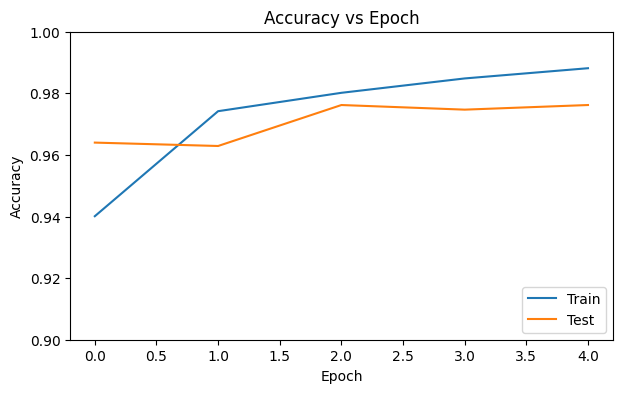

In [20]:
# Plot accuracy vs epoch
plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(['Train', 'Test'],loc='lower right')
plt.savefig('accuracy_vs_epoch_FNN.png')

#### Plot: Loss vs Epoch

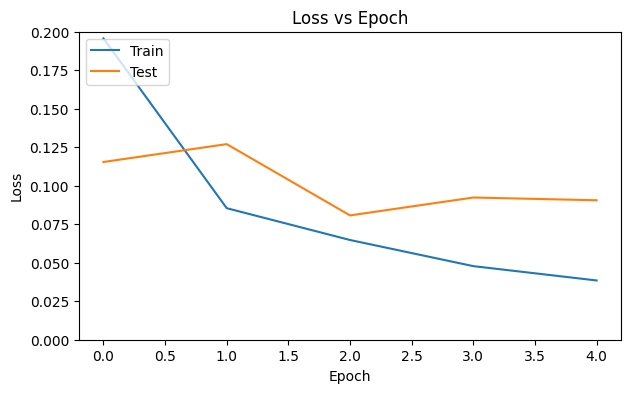

In [21]:
# Plot loss vs epoch
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='upper right')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('loss_vs_epoch_FNN.png')

plt.show()

### Visualising the Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


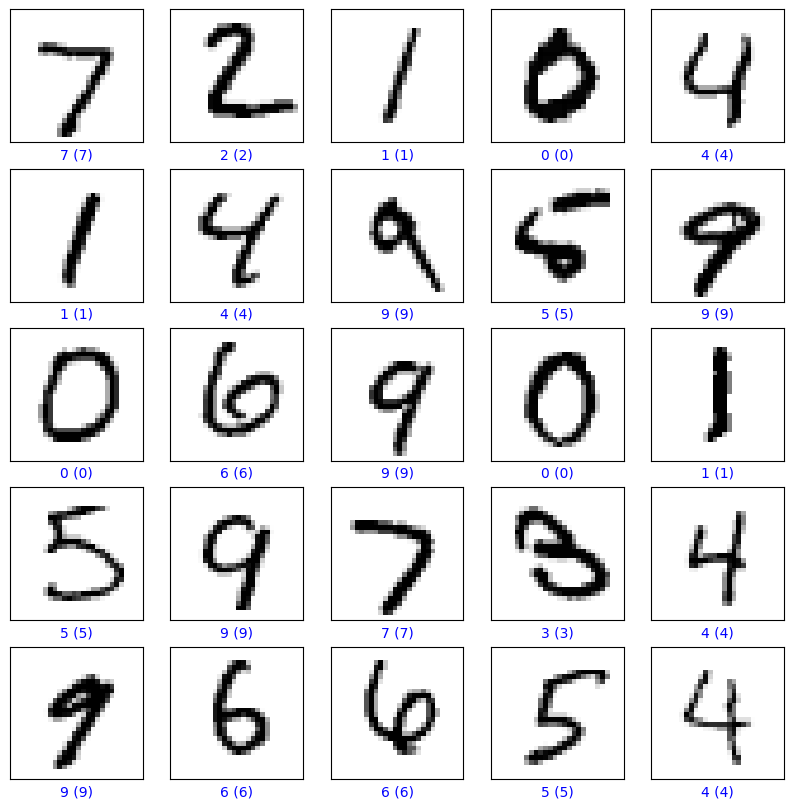

In [22]:
# Visualising the Predictions
# Make predictions
predictions = model.predict(test_images)

# Define class names
class_names = [str(i) for i in range(10)]

# Display some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.savefig('Predictions_FNN.png')
plt.show()


### Tabulating Classification Report

In [23]:
# Tabulating Classification Report
# One-hot encode the labels
train_labels_cat, test_labels_cat = to_categorical(train_labels), to_categorical(test_labels)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = test_labels



In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()*100

# Calculate accuracy for each class
report_df['accuracy'] = report_df.apply(lambda row: row['support'] * row['recall'] / row['support'] 
    if row.name in class_names else np.nan, axis=1)

# Remove accuracy, macro avg, and weighted avg rows
report_df = report_df.loc[class_names]

# Select and reorder columns
report_df = report_df[['accuracy', 'precision', 'recall', 'f1-score']]

# Round the DataFrame to 2 decimal places
report_df = report_df.round(2)


Accuracy: 97.62


In [26]:

# Display the classification report in a box format
print(tabulate(report_df, headers='keys', tablefmt='grid'))

# Optionally, save the table to a CSV file
report_df.to_csv('classification_report_FNN.csv', index=True)


+----+------------+-------------+----------+------------+
|    |   accuracy |   precision |   recall |   f1-score |
+====+============+=============+==========+============+
|  0 |      99.39 |       99.08 |    99.39 |      99.24 |
+----+------------+-------------+----------+------------+
|  1 |      99.03 |       99.56 |    99.03 |      99.29 |
+----+------------+-------------+----------+------------+
|  2 |      98.16 |       96.57 |    98.16 |      97.36 |
+----+------------+-------------+----------+------------+
|  3 |      97.92 |       96.21 |    97.92 |      97.06 |
+----+------------+-------------+----------+------------+
|  4 |      96.74 |       97.14 |    96.74 |      96.94 |
+----+------------+-------------+----------+------------+
|  5 |      94.51 |       98.71 |    94.51 |      96.56 |
+----+------------+-------------+----------+------------+
|  6 |      97.29 |       99.25 |    97.29 |      98.26 |
+----+------------+-------------+----------+------------+
|  7 |      98

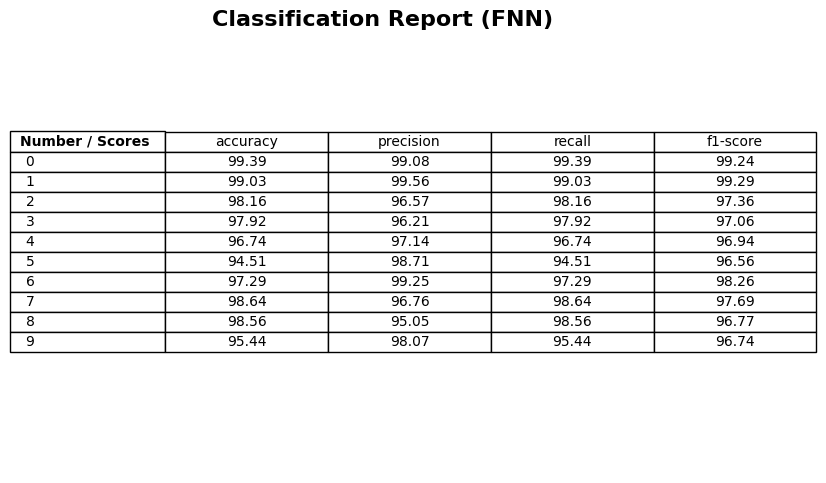

In [27]:

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(7, 6))  # Adjust the size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=report_df.values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 cellLoc='center',
                 loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Add corner label
table.add_cell(0, -1, width=0.15, height=0.045)
table[0, -1].set_text_props(text='Number / Scores', weight='bold')

# Add a title to the plot
plt.title('Classification Report (FNN)', x=0.3, y=0.95, fontsize=16, fontweight='bold', ha='center')

# Save the table as an image
plt.savefig('classification_report_FNN.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()